# Michigan State University  &ndash; Department of Mathematics
## MTH 451 &ndash; Numerical Analysis I &ndash; Fall 2024 Sec 001
---
### Project 2 &ndash; Runge-Kutta Methods

**Name:** Lowell Monis

**Instructor:** Dr. Di Liu

**Course Grader:** Jason Curtachio

**Prompt:** Implement a Python code for the fourth-order Runge-Kutta method. Verify the convergence rate using equation $x'(t)=-x(x^2-1)$

---
One proceeds with constructing a function that implements the fourth-order Runge-Kutta method, or $\text{RK}_4$. A plot is also generated to demonstrate the solution.

#### Setup

One can use Algorithm $\S 5.2$ [1].

To proceed, one can use the following modules:

1. `numpy`: NumPy's vectorization property can be put to good use to perform advanced mathematical computations.
2. `matplotlib`: To demonstrate a good fit of the solution, one needs to generate plots. This module is imported to that end.
3. `scipy`: To compare the results from our code with the actual solution, this module can be imported.

The function is also defined here.

$$\frac{dx}{dt}=f(t,x)=-x(x^2-1)=x-x^3$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def f(t, x):
    return x - (x**3)

#### Assumptions

We will be assuming that the initial value of this problem is:

$$x(0)=0.5$$

We will also assume the values of the start, end, and number of points.

- $a = 0$
- $b = 5$
- $N = 20$

From this, we can compute the value of step-size using:

$$h=\frac{b-a}{N}=\frac{5-0}{20}=\frac{1}{4}$$

#### Defining a function for $\text{RK}_4$

One first defines a function to implement fourth-order Runge-Kutta, and then use it to solve the problem for an assumed value of $N$, and thus $h$.

In [2]:
def RK4(f, a, b, N, x0):
    h = (b - a) / N                      # step size
    t = np.linspace(a, b, N + 1)         # time steps
    sols = np.zeros(N + 1)               # creating placeholder for solutions 
    sols[0] = x0                         # updating solutions with initial value
    
    # looping through each solution values to complete RK4
    for i in range(N):
        t_i = t[i]
        x = sols[i]

        # computing slopes
        k1 = h * f(t, x)
        k2 = h * f(t + (h / 2), x + (k1 / 2))
        k3 = h * f(t + (h / 2), x + (k2 / 2))
        k4 = h * f(t + h, x + k3)
        
        sols[i + 1] = x + (k1 + (2 * k2) + (2 * k3) + k4) / 6
    
    return t, sols

#### Solving the given differential equation

One now utilizes the function created above to solve $\frac{dx}{dt}=f(t,x)=-x(x^2-1)=x-x^3$. One then plots the computed values.

In [3]:
a = 0     # start
b = 5     # end
x0 = 0.5  # initial value
N = 20    # Number of steps

t_values, x_values = RK4(f, a, b, N, x0)

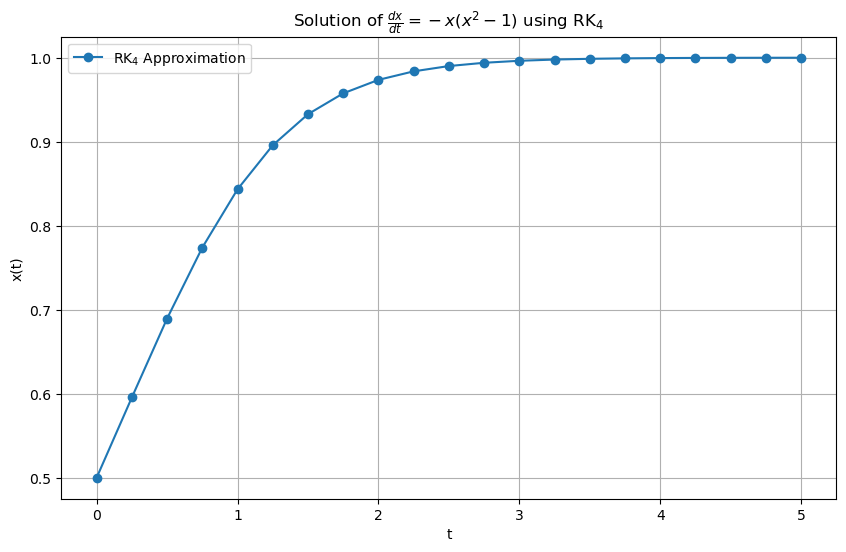

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(t_values, x_values, label="$\\text{RK}_4$ Approximation", marker="o")
plt.title("Solution of $\\frac{dx}{dt} = -x(x^2 - 1)$ using $\\text{RK}_4$")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()
plt.grid()
plt.show()

#### Verifying the accuracy of the function defined

One can now use Python's `SciPy` module to verify the accuracy of the function created to implement Runge-Kutta order of four. The method used in `scipy.integrate.solve_ivp()` should be `RK45`.

In [5]:
t_eval = np.linspace(a, b, N + 1)
solution = solve_ivp(f, [a, b], [x0], method='RK45', t_eval=t_eval)
t_values = solution.t
x_scipy = solution.y[0]

Finally, one can plot the solutions to visually confirm the accuracy of the implementation. One can observe a perfect overlap.

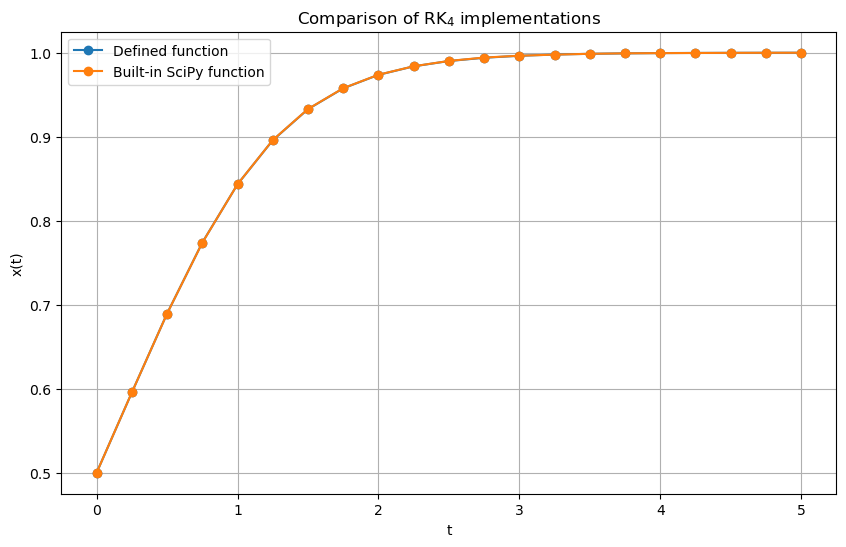

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(t_values, x_values, label="Defined function", marker="o")
plt.plot(t_values, x_scipy, label="Built-in SciPy function", marker="o")
plt.title("Comparison of $\\text{RK}_4$ implementations")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()
plt.grid()
plt.show()

#### Solutions for $\frac{dx}{dt}=f(t,x)=-x(x^2-1)=x-x^3$

In [7]:
print("\t  t\t\t   x")
print("=====================================")
for i in range(len(t_values)):
    print("\t","{:.2f}".format(t_values[i]),"\t\t","{:.2f}".format(x_values[i]))

	  t		   x
	 0.00 		 0.50
	 0.25 		 0.60
	 0.50 		 0.69
	 0.75 		 0.77
	 1.00 		 0.84
	 1.25 		 0.90
	 1.50 		 0.93
	 1.75 		 0.96
	 2.00 		 0.97
	 2.25 		 0.98
	 2.50 		 0.99
	 2.75 		 0.99
	 3.00 		 1.00
	 3.25 		 1.00
	 3.50 		 1.00
	 3.75 		 1.00
	 4.00 		 1.00
	 4.25 		 1.00
	 4.50 		 1.00
	 4.75 		 1.00
	 5.00 		 1.00


#### Verification of Convergence Rate

In order to verify the convergence rate, we will be decreasing the value of the step size. First, we find the solutions using the Runge-Kutta method for these decreasing values of step-sizes. Thus, we input infinitesimal $N$ values.

In [8]:
N_values = range(20, 10001, 10)

solutions = [RK4(f, a, b, N, x0) for N in N_values]

To compute the convergence rate, one needs to find all the errors for a decreasing value of step-size. To do this, one has to compute the analytical solutions.

The analytical solution was found to be:

$$x = \frac{1}{1+3e^{-2t}}$$

In [16]:
def analytical(t):
    return np.sqrt(1/((3*np.exp(-2*t))+1))

We then compute the error. In order to simplify the calculation of the convergence rate, we use the following formula that uses the norm:

$$\text{Error }=\left|\left|\sum_{i=0}^{N}\bar x_i\right|\right|$$

To incorporate this, we use `numpy.linalg.norm()`

In [10]:
errors = []

for solution in solutions:
    t, x = solution
    error = np.linalg.norm(x-analytical(t))
    errors.append(error)

Upon finding these errors, one can now compute the convergence rate. Since the order of the method was four, the rate should be $O(h^4)$.

Computing the convergence rate:

$$p_i = \frac{\log{E_i}}{\log{h_i}}$$

In [11]:
h_values_log = np.log((b-a)/np.array(N_values))

errors_log = np.log(errors)

rate = errors_log/h_values_log

Text(0, 0.5, 'Convergence Rate')

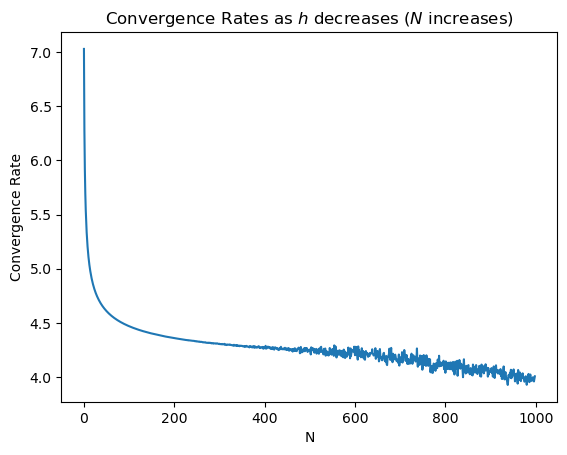

In [15]:
plt.plot(rate)
plt.title("Convergence Rates as $h$ decreases ($N$ increases)")
plt.xlabel("N")
plt.ylabel("Convergence Rate")

Since we used the norm for the error values, you can observe the values of convergence rates as we approach $4$ fluctuates between $3.8$ and $4.2$.

#### Conclusion

Upon computing the convergence rate for each value of $N$, we find that as the step size $h$ decreases (hence increasing the accuracy of Runge-Kutta methods), the convergence rate converges to $4$, showing that the convergence rate of the equation is of the order $4$, or $O(h^4)$. Hence, verified. $\square$

---
#### References

[1]	R. L. Burden and J. D. Faires, Numerical Analysis, 9th ed. Florence, AL: Cengage Learning, 2010.